Task 1.1: Exploratory Data Analysis (EDA)

Load Libraries and Dataset

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/content/Titanic-Dataset.csv')  # Replace 'titanic.csv' with your file path

Basic Statistical Summaries

In [2]:
# Display first few rows
print(df.head())

# Display last few rows
print(df.tail())

# Check dataset shape
print(f"Dataset Shape: {df.shape}")

# Get basic statistics
print(df.describe())

# Check data types and missing values
print(df.info())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
  

Handle Missing Values


In [3]:
# Check missing values
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [4]:
# Fill missing 'Age' with median age grouped by Pclass
df['Age'].fillna(df.groupby('Pclass')['Age'].transform('median'), inplace=True)

# Fill missing 'Embarked' with the mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop 'Cabin' column due to too many missing values
df.drop(columns=['Cabin'], inplace=True)

<ipython-input-4-ba2bcd70c76f>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df.groupby('Pclass')['Age'].transform('median'), inplace=True)
<ipython-input-4-ba2bcd70c76f>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(va

In [5]:
# Check missing values
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


Detect and Handle Outliers

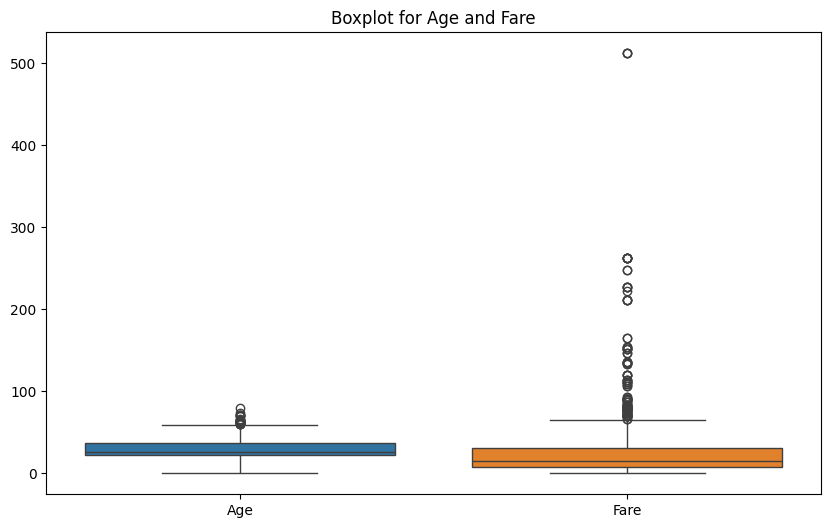

In [6]:
# Visualize outliers using boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Age', 'Fare']])
plt.title('Boxplot for Age and Fare')
plt.show()


In [11]:

# Handle outliers in 'Fare' using IQR method
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df['Fare'] = np.where(df['Fare'] > upper_bound, upper_bound, df['Fare'])
df['Fare'] = np.where(df['Fare'] < lower_bound, lower_bound, df['Fare'])


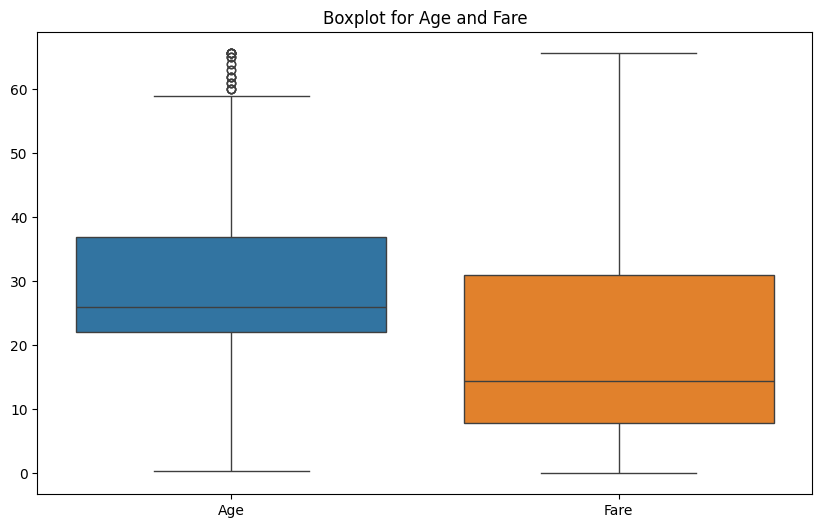

In [12]:
# Again Visualize outliers using boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Age', 'Fare']])
plt.title('Boxplot for Age and Fare')
plt.show()

Visualize Key Insights

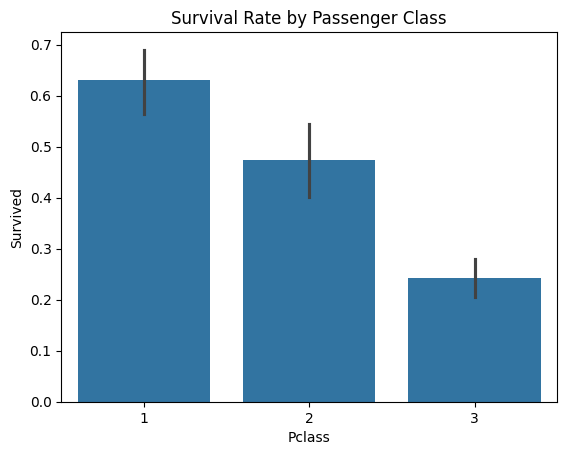

In [13]:
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Passenger Class')
plt.show()

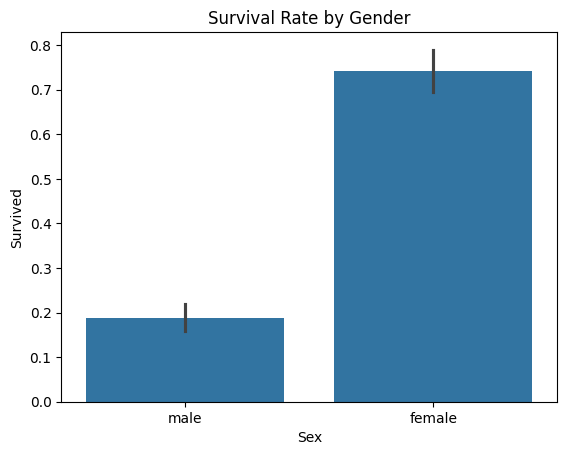

In [14]:
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Gender')
plt.show()

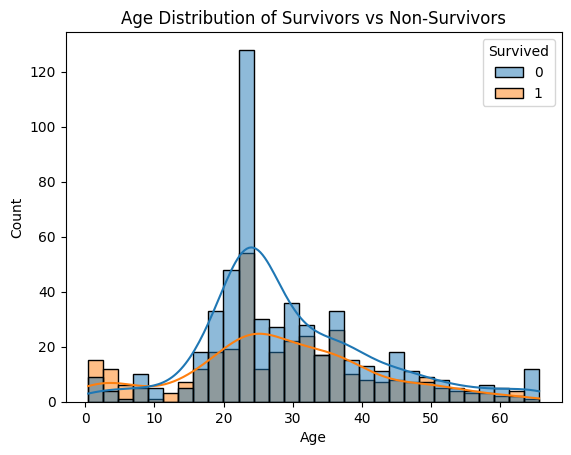

In [15]:
sns.histplot(data=df, x='Age', hue='Survived', kde=True, bins=30)
plt.title('Age Distribution of Survivors vs Non-Survivors')
plt.show()

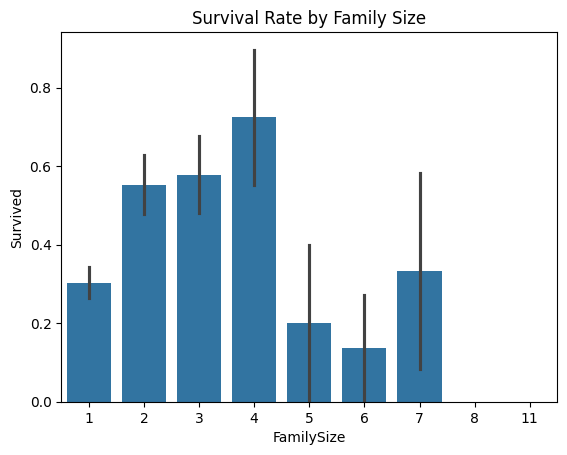

In [16]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1  # Adding 1 for the passenger themselves
sns.barplot(x='FamilySize', y='Survived', data=df)
plt.title('Survival Rate by Family Size')
plt.show()

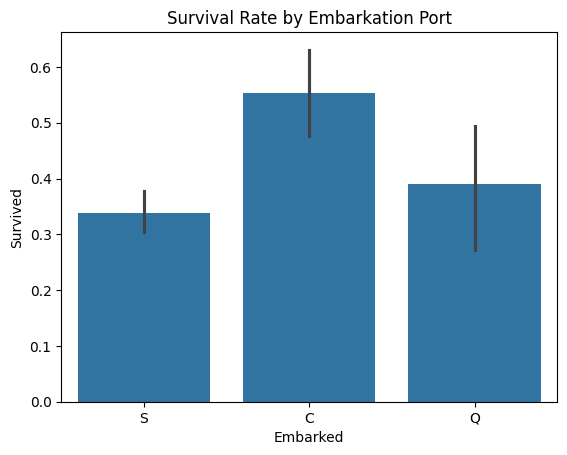

In [17]:
sns.barplot(x='Embarked', y='Survived', data=df)
plt.title('Survival Rate by Embarkation Port')
plt.show()

Task 1.2: Machine Learning Model

Feature Engineering

In [18]:
# Convert 'Sex' to numerical (male=0, female=1)
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# One-hot encode 'Embarked'
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

# Add 'IsAlone' feature
df['IsAlone'] = df['FamilySize'].apply(lambda x: 1 if x == 1 else 0)

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

Split Dataset

In [20]:
from sklearn.model_selection import train_test_split

# Define features and target
X = df.drop(columns=['Survived', 'Name', 'Ticket', 'PassengerId'])
y = df['Survived']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Train a model

In [21]:
from sklearn.linear_model import LogisticRegression

# Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

Model Performance

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predict on test set
y_pred = model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Accuracy: 0.8101
Precision: 0.7941
Recall: 0.7297
F1-Score: 0.7606


**Bonus Task**

Compare Multiple Models

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Train Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Train SVM
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train, y_train)

# Evaluate models
models = {'Logistic Regression': model, 'Random Forest': rf_model, 'SVM': svm_model}
for name, mdl in models.items():
    y_pred = mdl.predict(X_test)
    print(f"{name} - Accuracy: {accuracy_score(y_test, y_pred):.4f}")

Logistic Regression - Accuracy: 0.8101
Random Forest - Accuracy: 0.8212
SVM - Accuracy: 0.8156


Hyperparameter Tuning

In [24]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Accuracy: {grid_search.best_score_:.4f}")

Best Parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}
Best Accuracy: 0.8160


Predictive System function

In [26]:
def predict_survival(passenger_details):
    # Create a DataFrame from the input details
    input_df = pd.DataFrame([passenger_details])

    # Preprocess the input data
    input_df['Sex'] = input_df['Sex'].map({'male': 0, 'female': 1})
    input_df = pd.get_dummies(input_df, columns=['Embarked'], drop_first=True)

    # Add missing columns if any (to match training data)
    missing_cols = set(X_train.columns) - set(input_df.columns)
    for col in missing_cols:
        input_df[col] = 0

    # Reorder columns to match training data
    input_df = input_df[X_train.columns]

    # Scale numerical features
    input_df[['Age', 'Fare']] = scaler.transform(input_df[['Age', 'Fare']])

    # Predict survival
    prediction = model.predict(input_df)[0]
    return "Survived" if prediction == 1 else "Did Not Survive"

# Sample Input
sample_passenger = {
    'Pclass': 3,
    'Sex': 'male',
    'Age': 22,
    'SibSp': 1,
    'Parch': 0,
    'Fare': 7.25,
    'Embarked': 'S'
}

# Predict survival for the sample passenger
result = predict_survival(sample_passenger)
print(f"Prediction: {result}")

Prediction: Did Not Survive
